Importacion de datos y medidas de las variables de los datos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv",keep_default_na=False)
data.describe(include='all')
data['Sleep Disorder']

0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

Codificacion de variables cualitativas

In [4]:
gender={
    'Male':0,
    'Female':1
}
occupation_encoding = {
    'Accountant': 1,
    'Doctor': 2,
    'Engineer': 3,
    'Lawyer': 4,
    'Manager': 5,
    'Nurse': 6,
    'Manager': 7,
    'Salesperson': 8,
    'Sales Representative': 9,
    'Scientist': 10,
    'Teacher': 11
}
bmi_category_encoding = {
    'Normal': 0,
    'Normal Weight':0,
    'Overweight': 1,
    'Obese': 2
}
sleep_disorder_encoding = {
    'None': 0,
    'Insomnia': 1,
    'Sleep Apnea': 2
}
data['Sleep Disorder'] = data['Sleep Disorder'].map(sleep_disorder_encoding)
data['Occupation'] = data['Occupation'].map(occupation_encoding)
data['BMI Category'] = data['BMI Category'].map(bmi_category_encoding)
data['Gender']=data["Gender"].map(gender)
data["Sleep Disorder"]


0      0
1      0
2      0
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int64

Correlación

In [5]:
data.corr(numeric_only=True)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
Person ID,1.000000,0.584229,0.990516,0.289746,0.296305,0.431612,0.149882,-0.394287,0.442905,-0.225467,0.043844,0.476492
Gender,0.584229,1.000000,0.596358,0.241890,0.121579,0.291366,-0.001454,-0.396018,0.242743,-0.217105,0.014509,0.362591
Age,0.990516,0.596358,1.000000,0.249637,0.344709,0.473734,0.178993,-0.422344,0.427704,-0.225606,0.057973,0.487832
Occupation,0.289746,0.241890,0.249637,1.000000,-0.331821,-0.287882,-0.103069,0.022923,0.639293,0.043007,-0.109174,0.482155
Sleep Duration,0.296305,0.121579,0.344709,-0.331821,1.000000,0.883213,0.212360,-0.811023,-0.349605,-0.516455,-0.039533,-0.239109
Quality of Sleep,0.431612,0.291366,0.473734,-0.287882,0.883213,1.000000,0.192896,-0.898752,-0.324413,-0.659865,0.016791,-0.213003
Physical Activity Level,0.149882,-0.001454,0.178993,-0.103069,0.212360,0.192896,1.000000,-0.034134,0.052076,0.136971,0.772723,0.236560
Stress Level,-0.394287,-0.396018,-0.422344,0.022923,-0.811023,-0.898752,-0.034134,1.000000,0.157649,0.670026,0.186829,0.151893
BMI Category,0.442905,0.242743,0.427704,0.639293,-0.349605,-0.324413,0.052076,0.157649,1.000000,0.469897,-0.142785,0.732479
Heart Rate,-0.225467,-0.217105,-0.225606,0.043007,-0.516455,-0.659865,0.136971,0.670026,0.469897,1.000000,-0.030309,0.384343


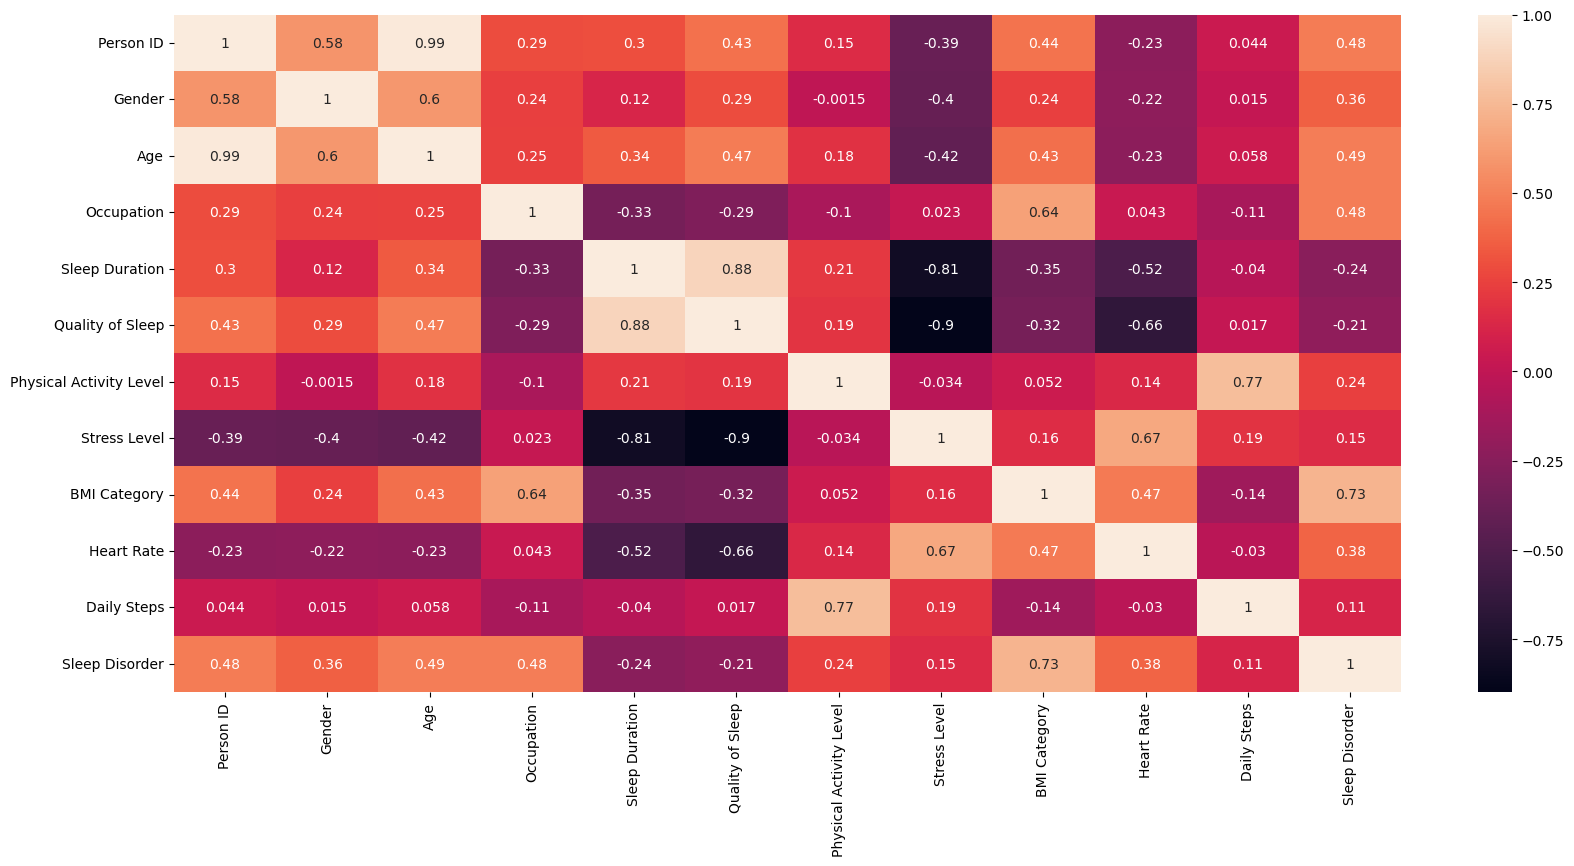

In [7]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), annot = True)
r = 1.1
plt.rcParams['figure.figsize'] = (r*18,r*8)  

plt.show()

Regresión lineal simple

In [8]:
import statsmodels.api as sm

# Definir las variables predictoras y la variable dependiente
X = data[['Sleep Duration']]
y = data['Quality of Sleep']

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1319.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.17e-124
Time:                        22:27:45   Log-Likelihood:                -314.22
No. Observations:                 374   AIC:                             632.4
Df Residuals:                     372   BIC:                             640.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.1634      0.262     -8.

In [9]:
# Definir las variables predictoras y la variable dependiente
X = data[[ 'Stress Level']]
y = data['Quality of Sleep']

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1563.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.88e-135
Time:                        22:27:48   Log-Likelihood:                -289.06
No. Observations:                 374   AIC:                             582.1
Df Residuals:                     372   BIC:                             590.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.5774      0.087    121.678   

In [10]:
# Definir las variables predictoras y la variable dependiente
X = data[['Heart Rate']]
y = data['Quality of Sleep']

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     286.9
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           4.13e-48
Time:                        22:27:50   Log-Likelihood:                -490.52
No. Observations:                 374   AIC:                             985.0
Df Residuals:                     372   BIC:                             992.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7131      0.792     26.136      0.0

In [11]:
# Definir las variables predictoras y la variable dependiente
X = data[['Age']]
y = data['Quality of Sleep']

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     107.6
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           2.55e-22
Time:                        22:27:52   Log-Likelihood:                -549.89
No. Observations:                 374   AIC:                             1104.
Df Residuals:                     372   BIC:                             1112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5549      0.271     16.785      0.0

In [12]:
# Definir las variables predictoras y la variable dependiente
X = data[['Physical Activity Level']]
y = data['Quality of Sleep']

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     14.38
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           0.000175
Time:                        22:27:55   Log-Likelihood:                -590.33
No. Observations:                 374   AIC:                             1185.
Df Residuals:                     372   BIC:                             1193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Regresión Lineal múltiple

In [13]:
# Definir las variables predictoras y la variable dependiente
X = data[['Sleep Duration', 'Stress Level','Heart Rate','Age']]
y = data['Quality of Sleep']

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     817.3
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          7.14e-182
Time:                        22:27:57   Log-Likelihood:                -169.48
No. Observations:                 374   AIC:                             349.0
Df Residuals:                     369   BIC:                             368.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.8688      0.553     10.

In [97]:
# Definir las variables predictoras y la variable dependiente
X = data[['Sleep Duration', 'Stress Level','Heart Rate']]
y = data['Quality of Sleep']

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     960.5
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.48e-174
Time:                        19:53:30   Log-Likelihood:                -191.00
No. Observations:                 374   AIC:                             390.0
Df Residuals:                     370   BIC:                             405.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.5484      0.575     11.

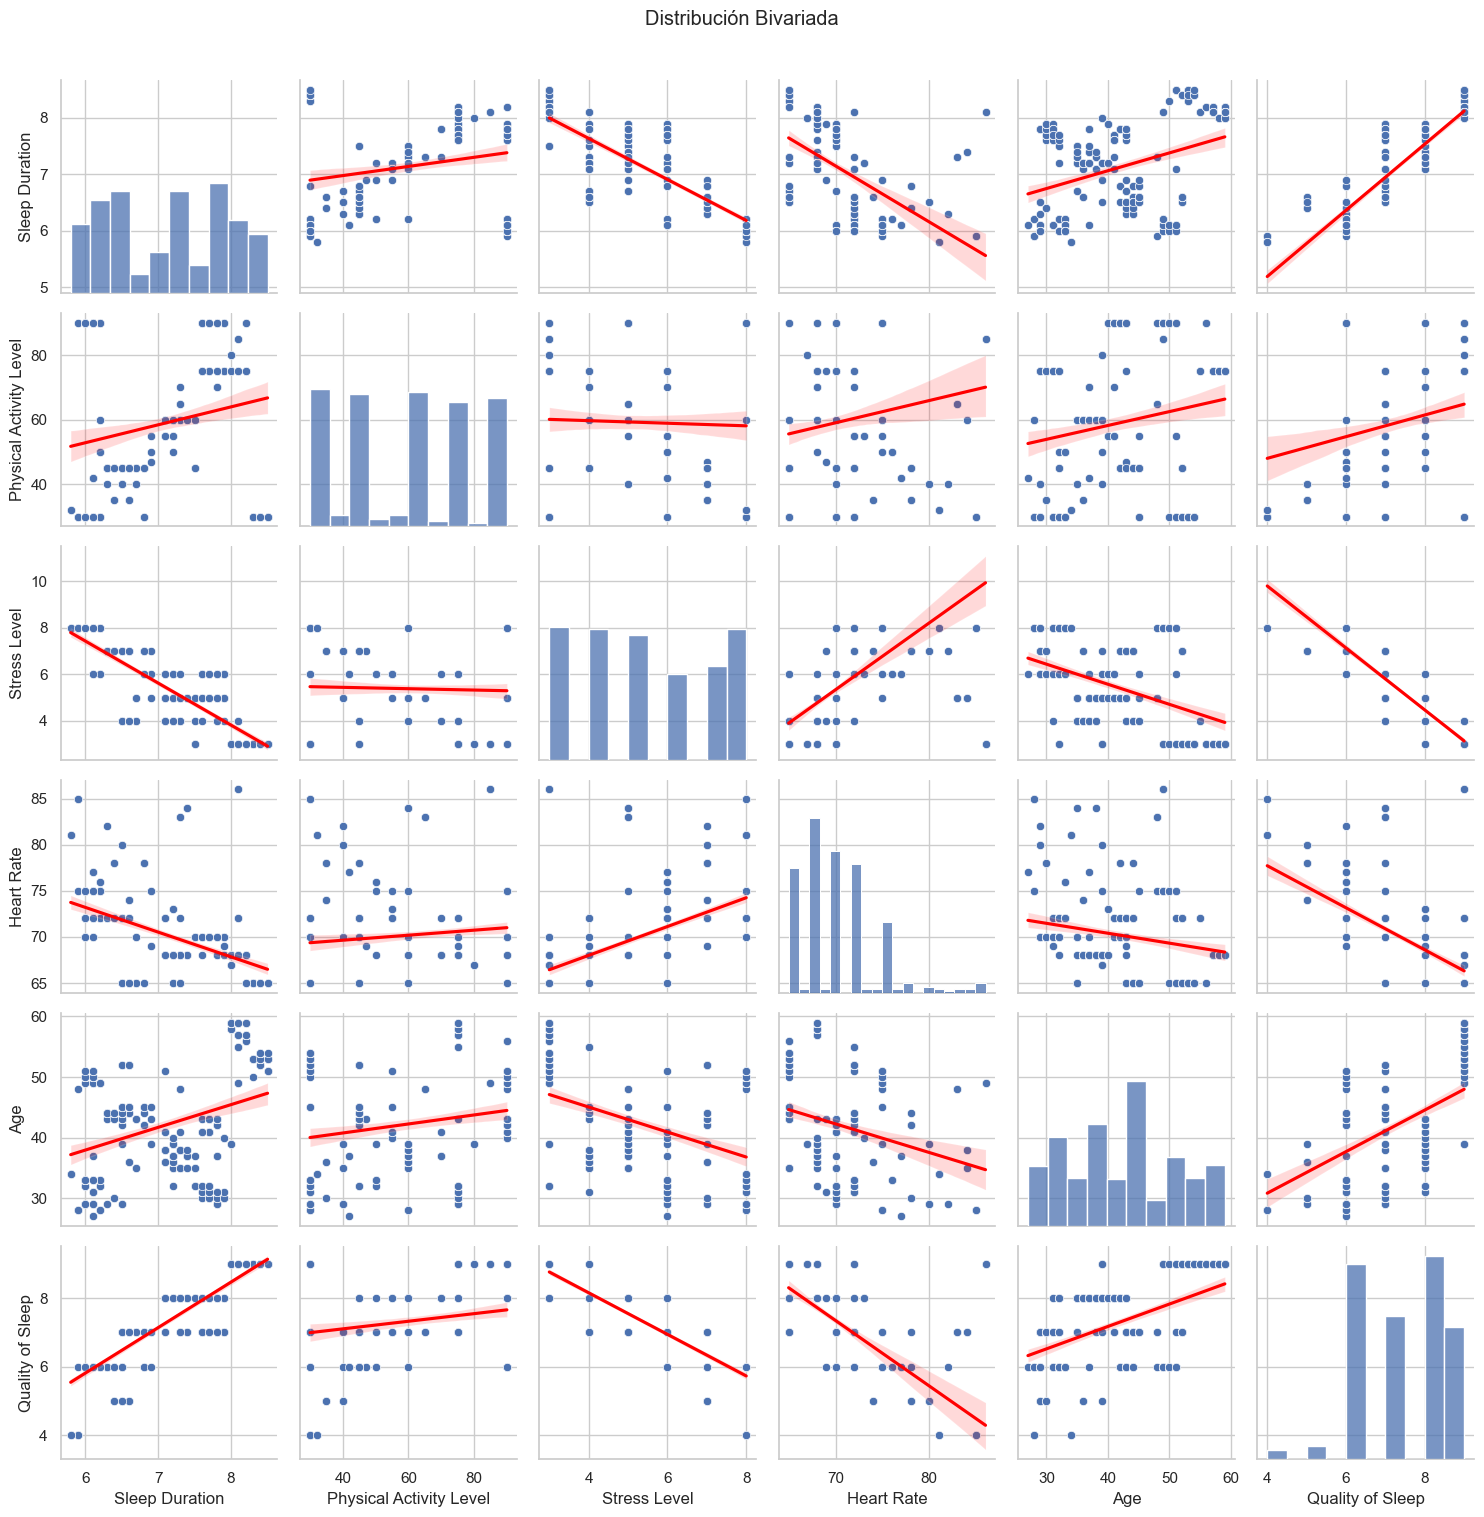

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supongamos que 'data' es tu DataFrame
# data = pd.DataFrame(...)

# Crear el pairplot
pairplot = sns.pairplot(data, vars=['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate','Age','Quality of Sleep'])

# Agregar la línea de tendencia a cada gráfico bivariado
for i in range(len(pairplot.axes)):
    for j in range(len(pairplot.axes)):
        if i != j:  # Solo los gráficos bivariados
            # Obtener los datos para las variables x e y
            x_var = pairplot.x_vars[j]
            y_var = pairplot.y_vars[i]
            sns.regplot(x=x_var, y=y_var, data=data, scatter=False, ax=pairplot.axes[i, j], color='red')

plt.suptitle('Distribución Bivariada', y=1.01)
plt.tight_layout()
plt.show()


Regresion Lineal Simple

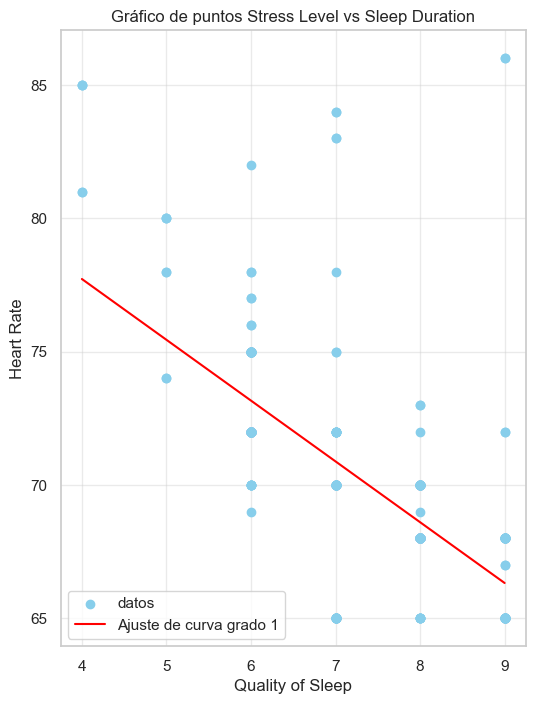

In [46]:
def Estimar_coeficientes(X,y, grado:int = 1): # X e Y son arreglos con los datos.
    X = np.column_stack([X**i for i in range(grado + 1)]) # Agregar una columna de 1's.
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ y  # Resolver sistema. En NumPy el producto de matrices se hace con "@"
    return coeficientes
X=data['Quality of Sleep'].to_numpy()
Y=data['Heart Rate'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.xlabel('Quality of Sleep')
plt.ylabel('Heart Rate')
plt.title('Gráfico de puntos Stress Level vs Sleep Duration')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

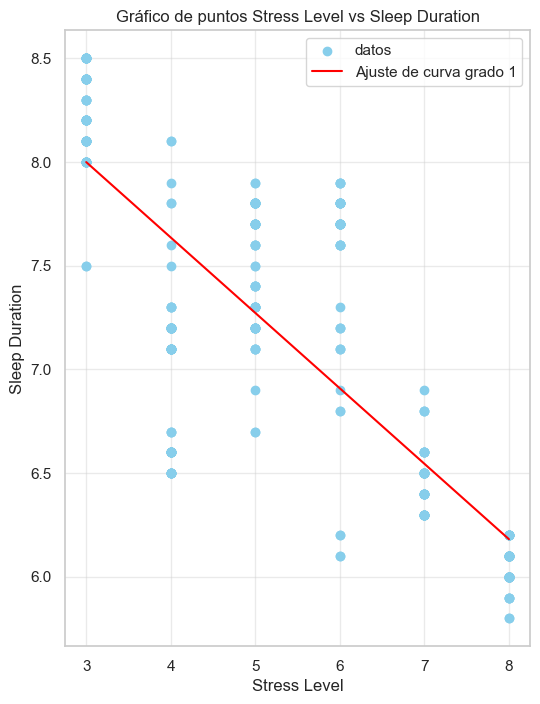

In [47]:
def Estimar_coeficientes(X,y, grado:int = 1): # X e Y son arreglos con los datos.
    X = np.column_stack([X**i for i in range(grado + 1)]) # Agregar una columna de 1's.
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ y  # Resolver sistema. En NumPy el producto de matrices se hace con "@"
    return coeficientes
X=data['Stress Level'].to_numpy()
Y=data['Sleep Duration'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.title('Gráfico de puntos Stress Level vs Sleep Duration')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()


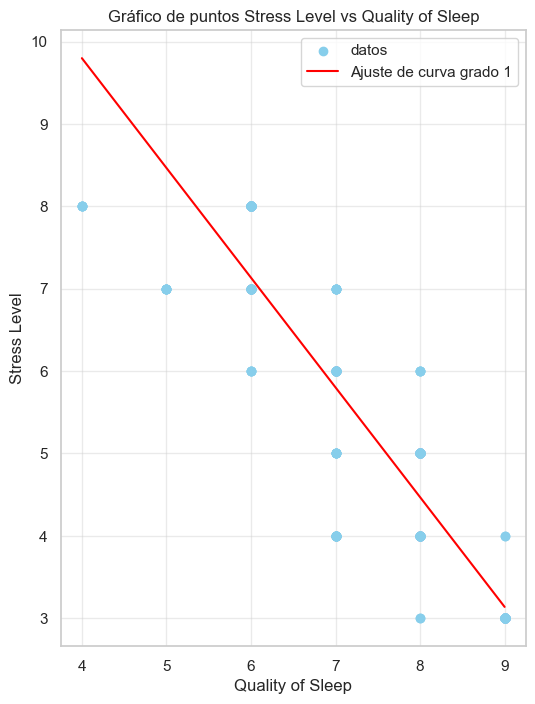

In [48]:
X=data['Quality of Sleep'].to_numpy()
Y=data['Stress Level'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')
plt.title('Gráfico de puntos Stress Level vs Quality of Sleep')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

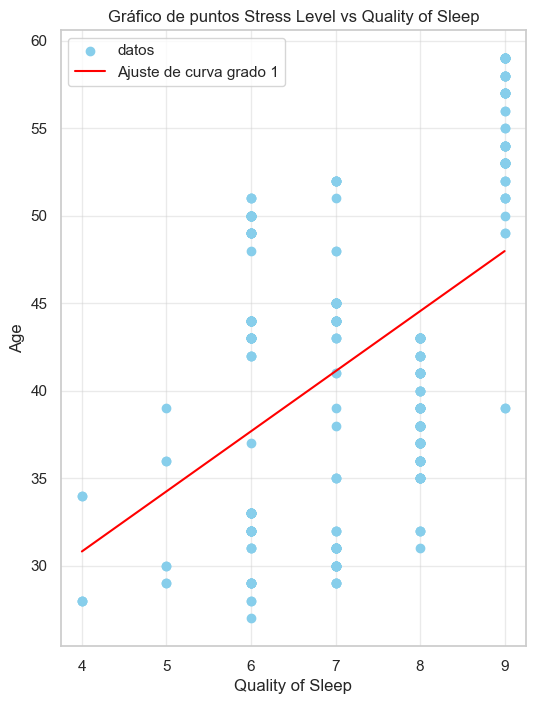

In [49]:
X=data['Quality of Sleep'].to_numpy()
Y=data['Age'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.xlabel('Quality of Sleep')
plt.ylabel('Age')
plt.title('Gráfico de puntos Stress Level vs Quality of Sleep')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

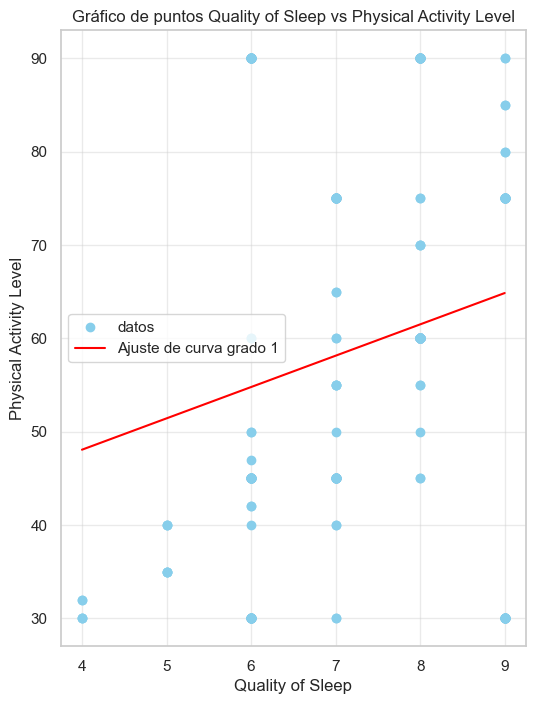

In [50]:
Y=data['Physical Activity Level'].to_numpy()
X=data['Quality of Sleep'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.ylabel('Physical Activity Level')
plt.xlabel('Quality of Sleep')
plt.title('Gráfico de puntos Quality of Sleep vs Physical Activity Level')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

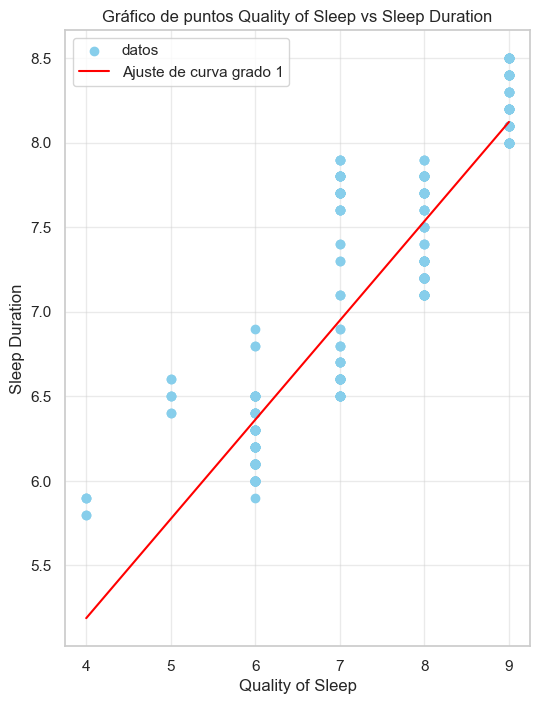

In [51]:
Y=data['Sleep Duration'].to_numpy()
X=data['Quality of Sleep'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.ylabel('Sleep Duration')
plt.xlabel('Quality of Sleep')
plt.title('Gráfico de puntos Quality of Sleep vs Sleep Duration')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

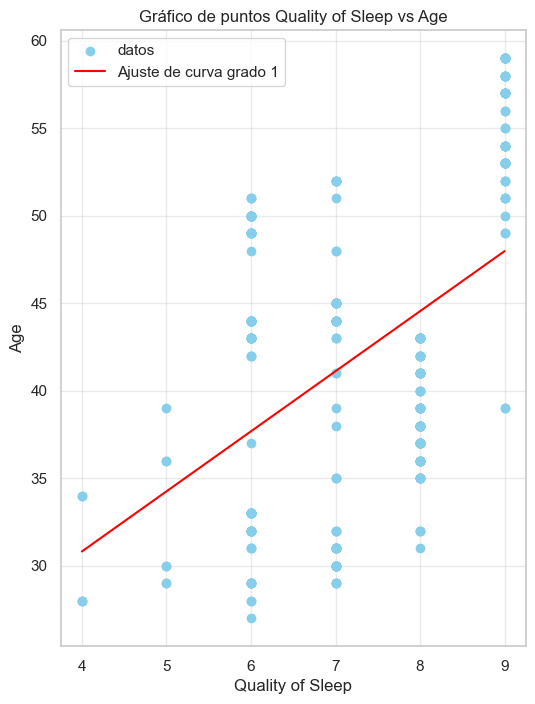

In [52]:
Y=data['Age'].to_numpy()
X=data['Quality of Sleep'].to_numpy()
Coef_Stress_Sleep = Estimar_coeficientes(X,Y)  # grado 1 tiene la forma y = b + ax
dom = np.linspace(min(X),max(X),100)  # intervalo entre el dato mínimo y máximo
rec = Coef_Stress_Sleep[0] + Coef_Stress_Sleep[1]*dom  # evaluar con la forma Y = aX + b
plt.figure(figsize=(6,8))
plt.scatter(X,Y, alpha=1, color='skyblue')  # Gráfico de puntos para los datos
plt.plot(dom,rec,color='red')  # Recta ajustada
plt.ylabel('Age')
plt.xlabel('Quality of Sleep')
plt.title('Gráfico de puntos Quality of Sleep vs Age')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva grado 1'])
plt.show()

Exploración de datos. Gráfico de distribuciones.

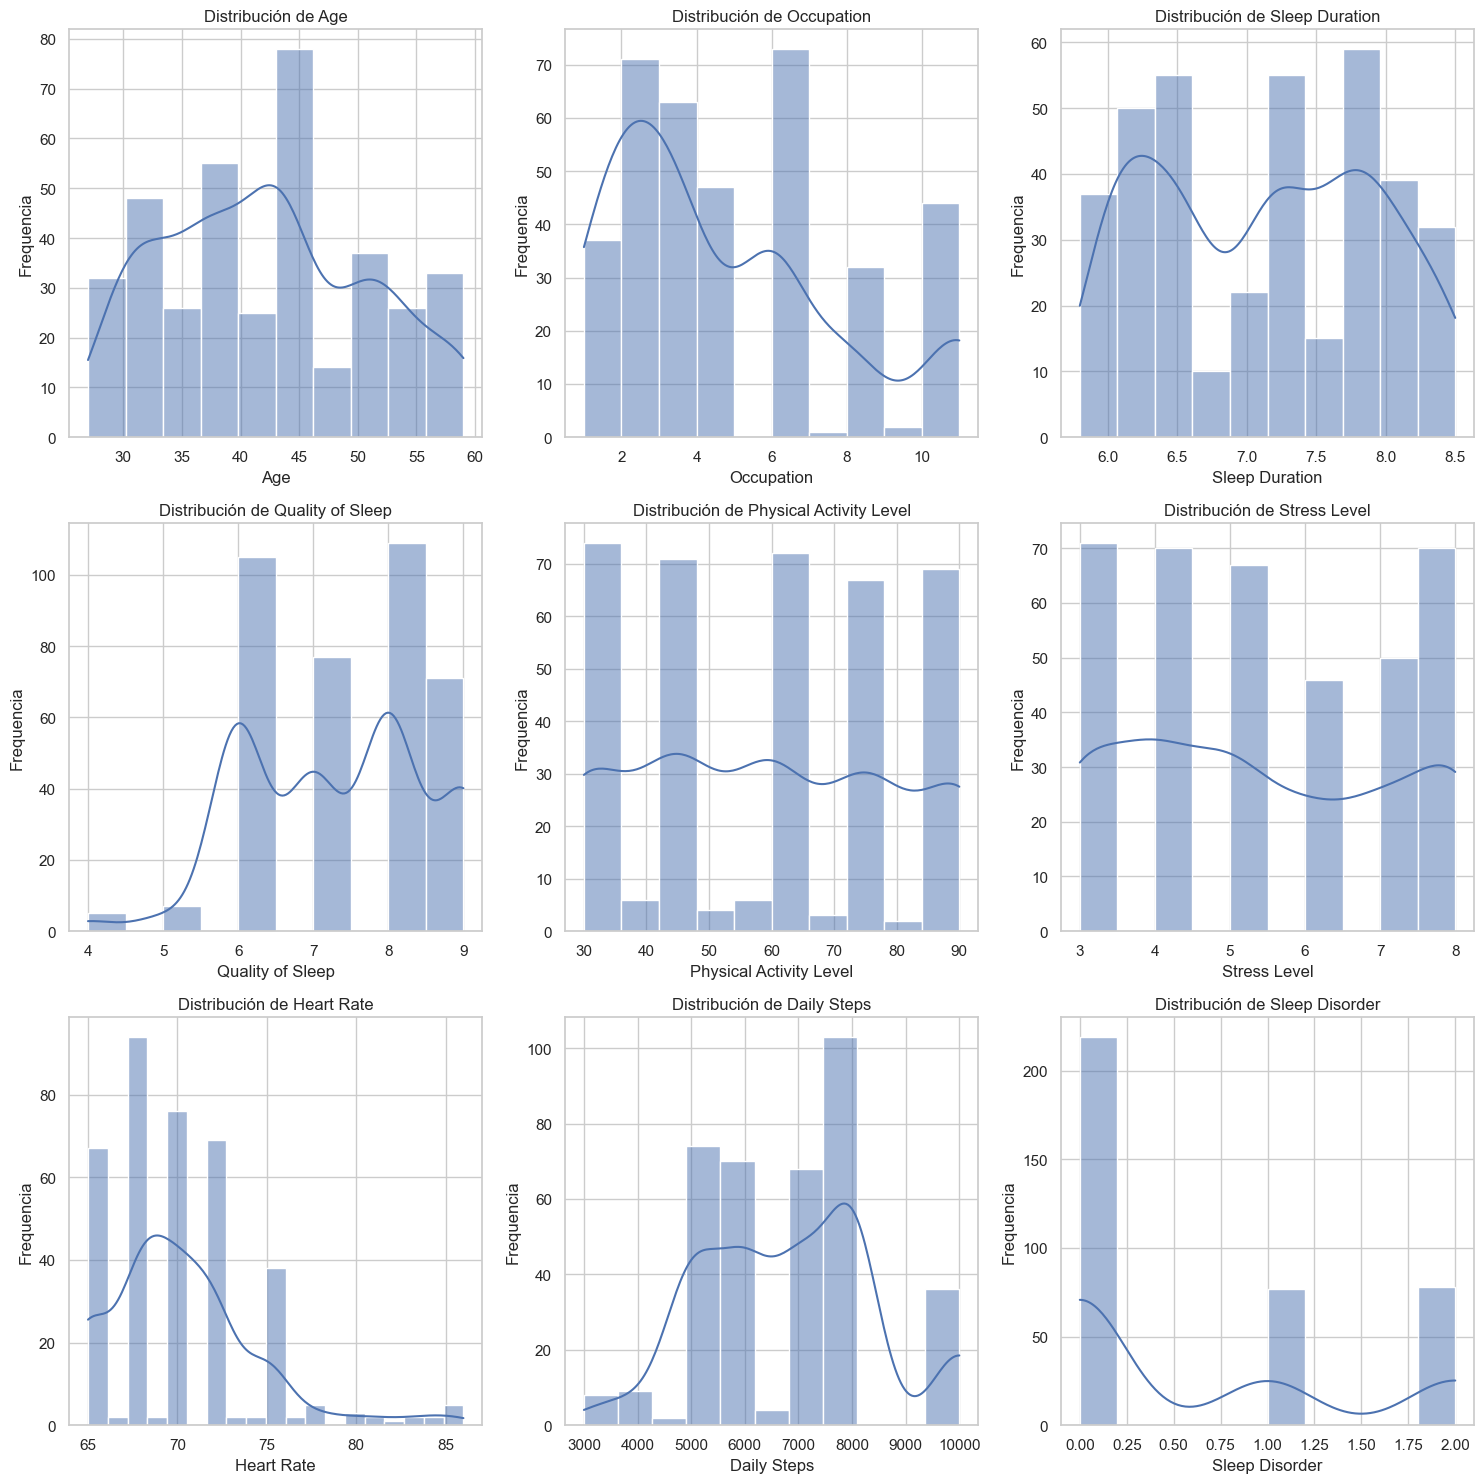

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# Select relevant columns for univariate analysis
columns_of_interest = [
    'Age','Occupation','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
    'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

# Plot histograms for each selected column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(columns_of_interest):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequencia')

plt.tight_layout()
plt.show()

Graficos variables

<Axes: >

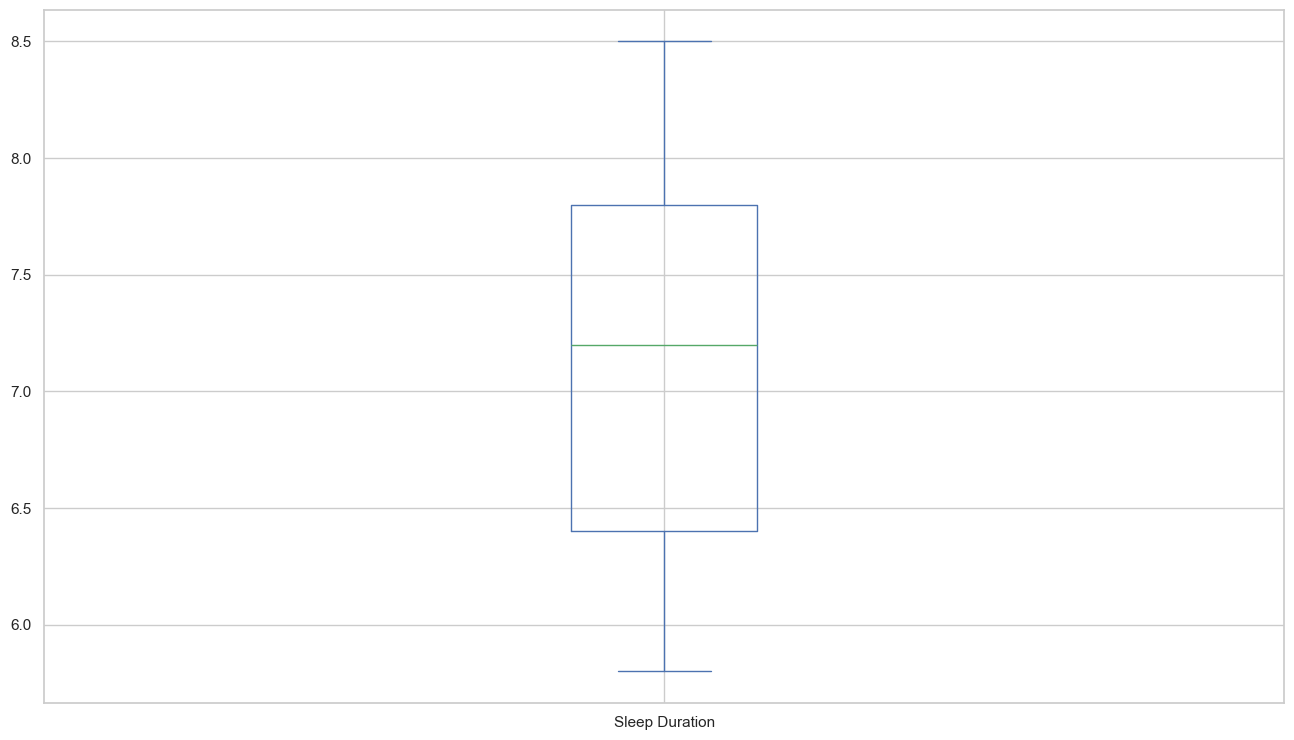

In [57]:
tiempo_de_dormir=data['Sleep Duration']
tiempo_de_dormir.plot(kind='box',figsize=(16,9),grid=True)

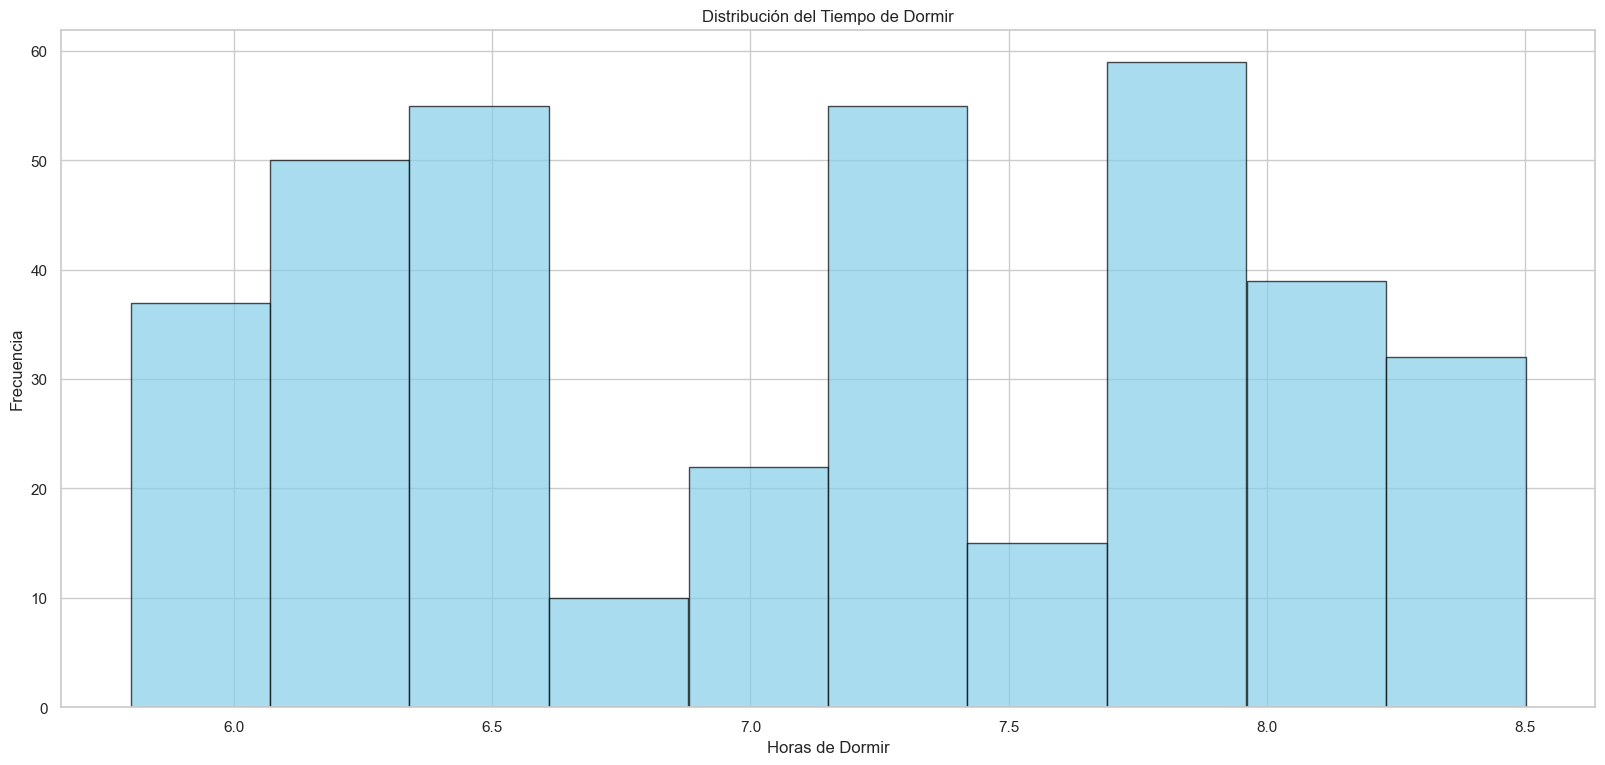

In [58]:

plt.hist(tiempo_de_dormir, bins='auto', color='skyblue', alpha=0.7, edgecolor='black')

plt.title('Distribución del Tiempo de Dormir')
plt.xlabel('Horas de Dormir')
plt.ylabel('Frecuencia')

plt.show()

Occupation
6.0     73
2.0     71
3.0     63
4.0     47
11.0    40
1.0     37
8.0     32
10.0     4
9.0      2
7.0      1
Name: count, dtype: int64

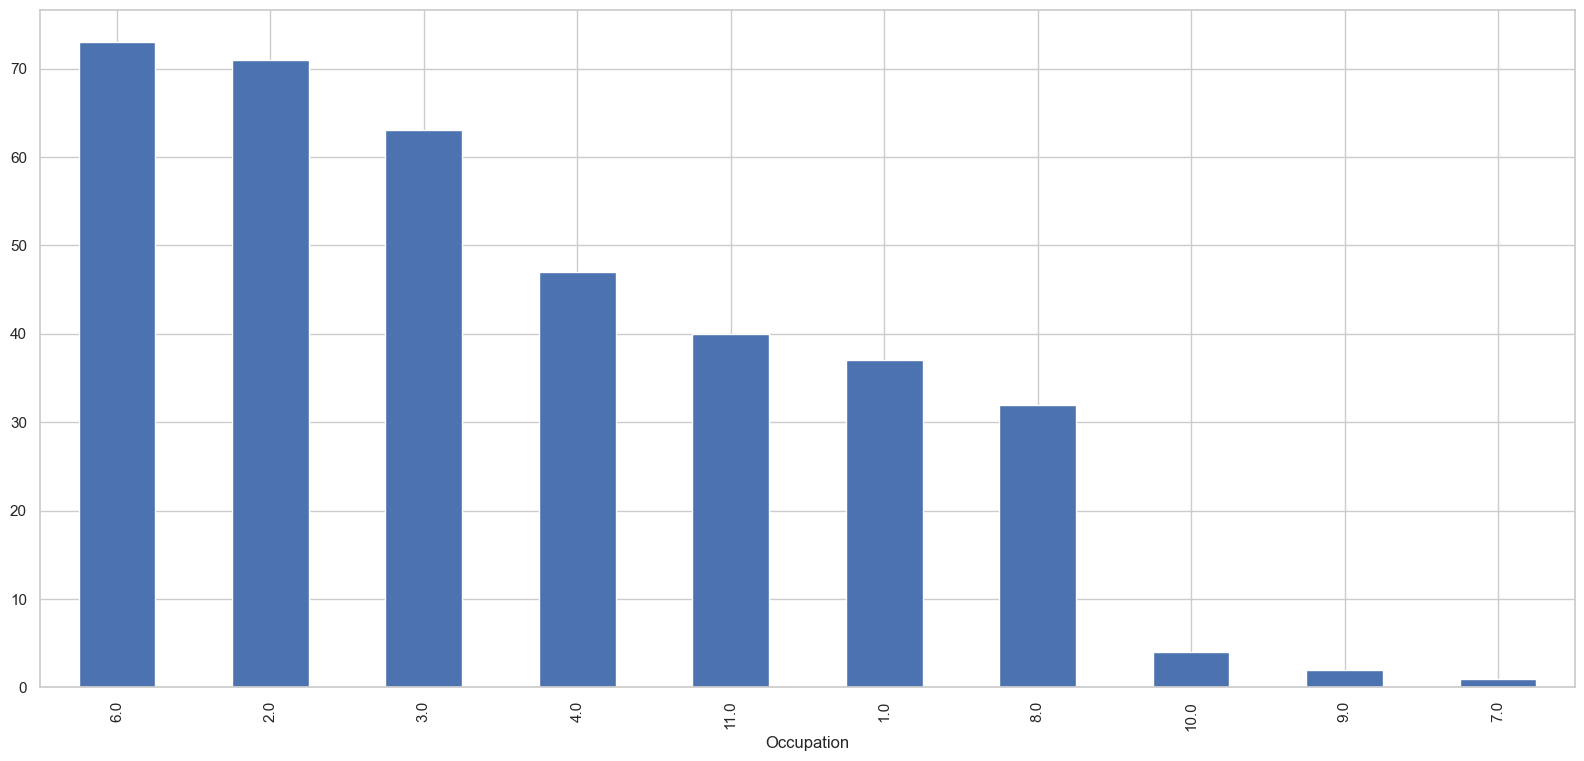

In [59]:
profesiones_count=data["Occupation"].value_counts()
profesiones_count.plot(kind="bar")
profesiones_count

<Axes: xlabel='BMI Category'>

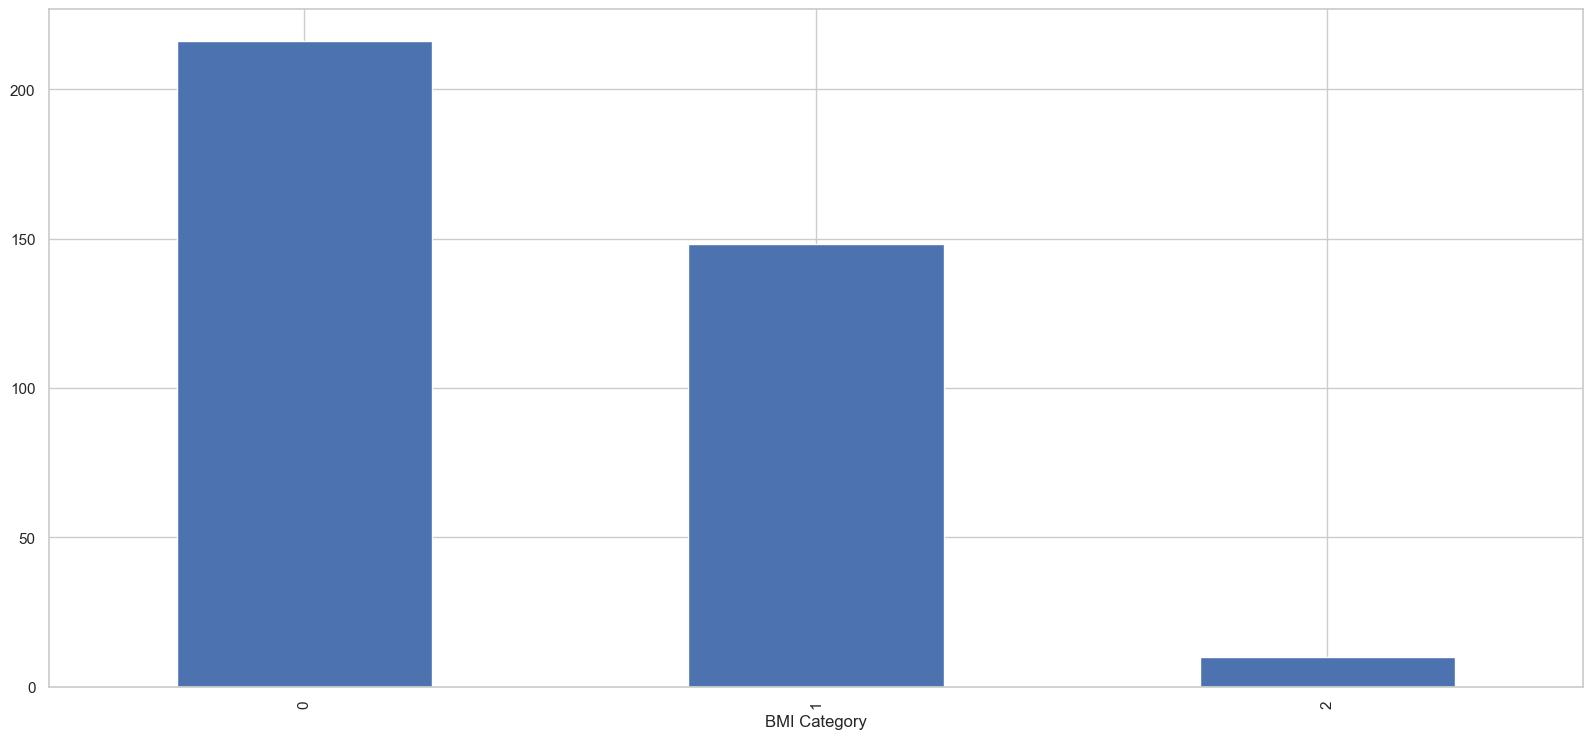

In [60]:
age_count=data["BMI Category"].value_counts()
age_count.plot(kind="bar")


<Axes: xlabel='Gender'>

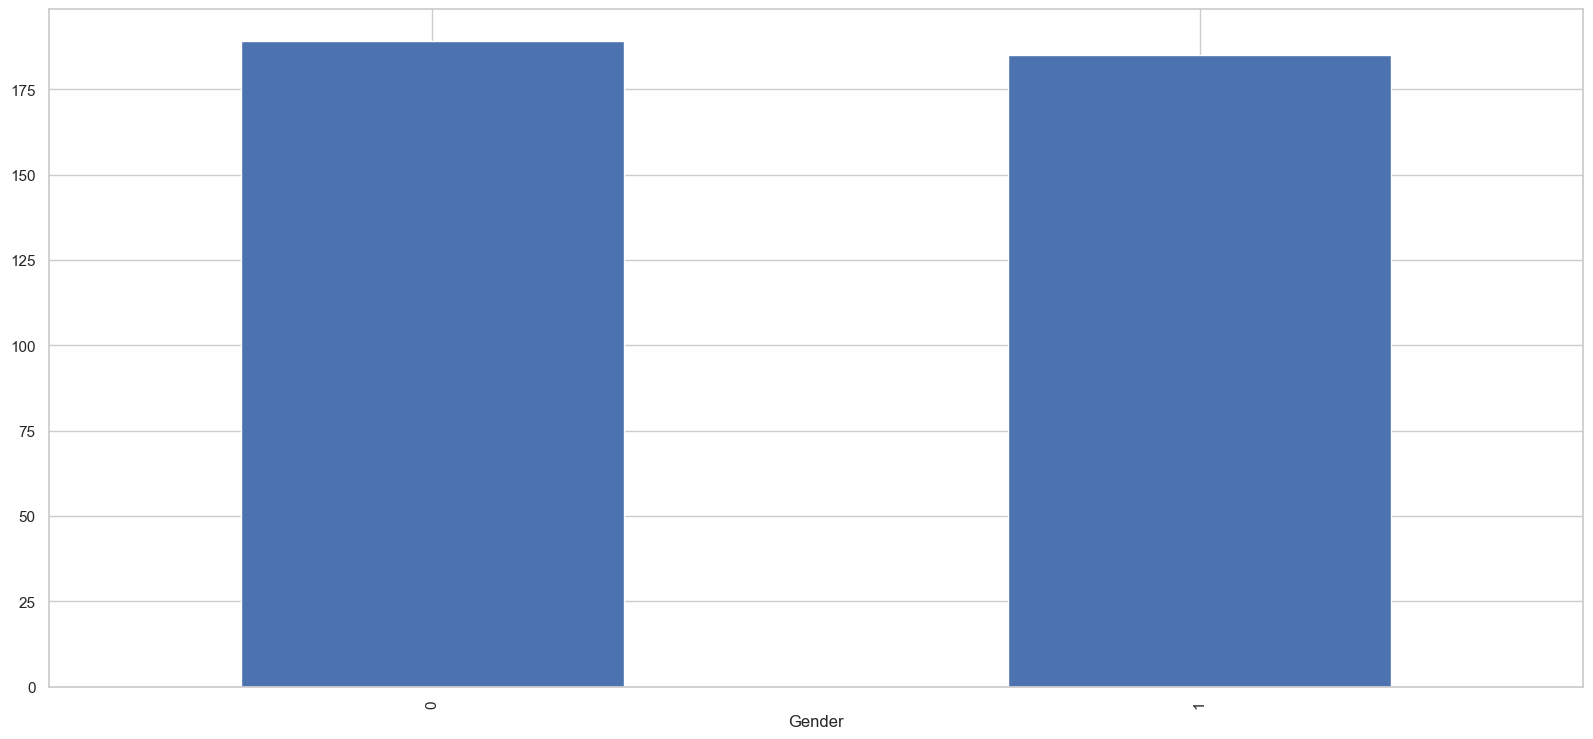

In [61]:
data_gender=data['Gender'].value_counts()
data_gender.plot(kind='bar')

<Axes: xlabel='Hours', ylabel='Frequency'>

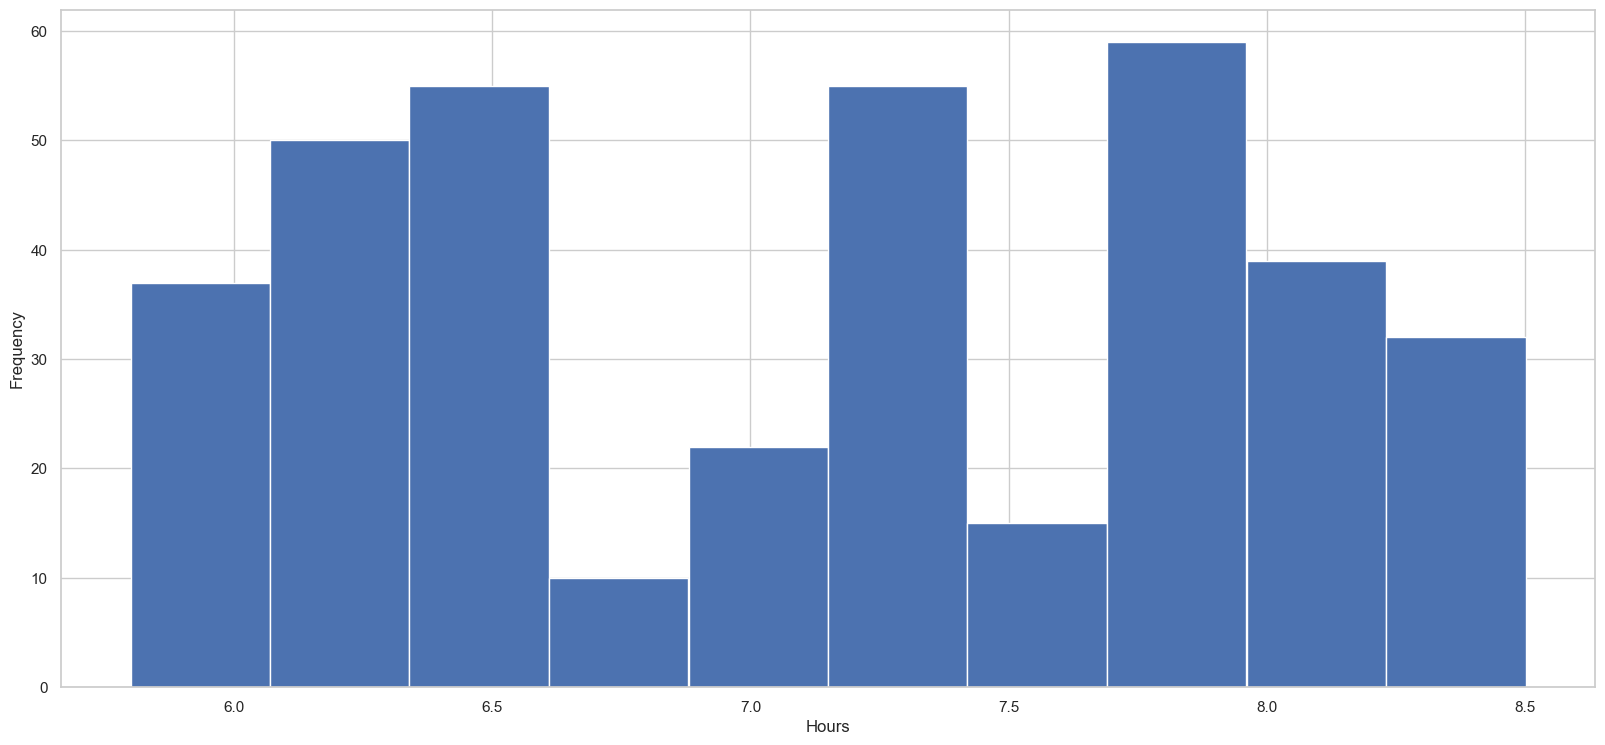

In [62]:
data["Sleep Duration"].plot(kind="hist",xlabel="Hours")


<Axes: xlabel='Sleep Disorder'>

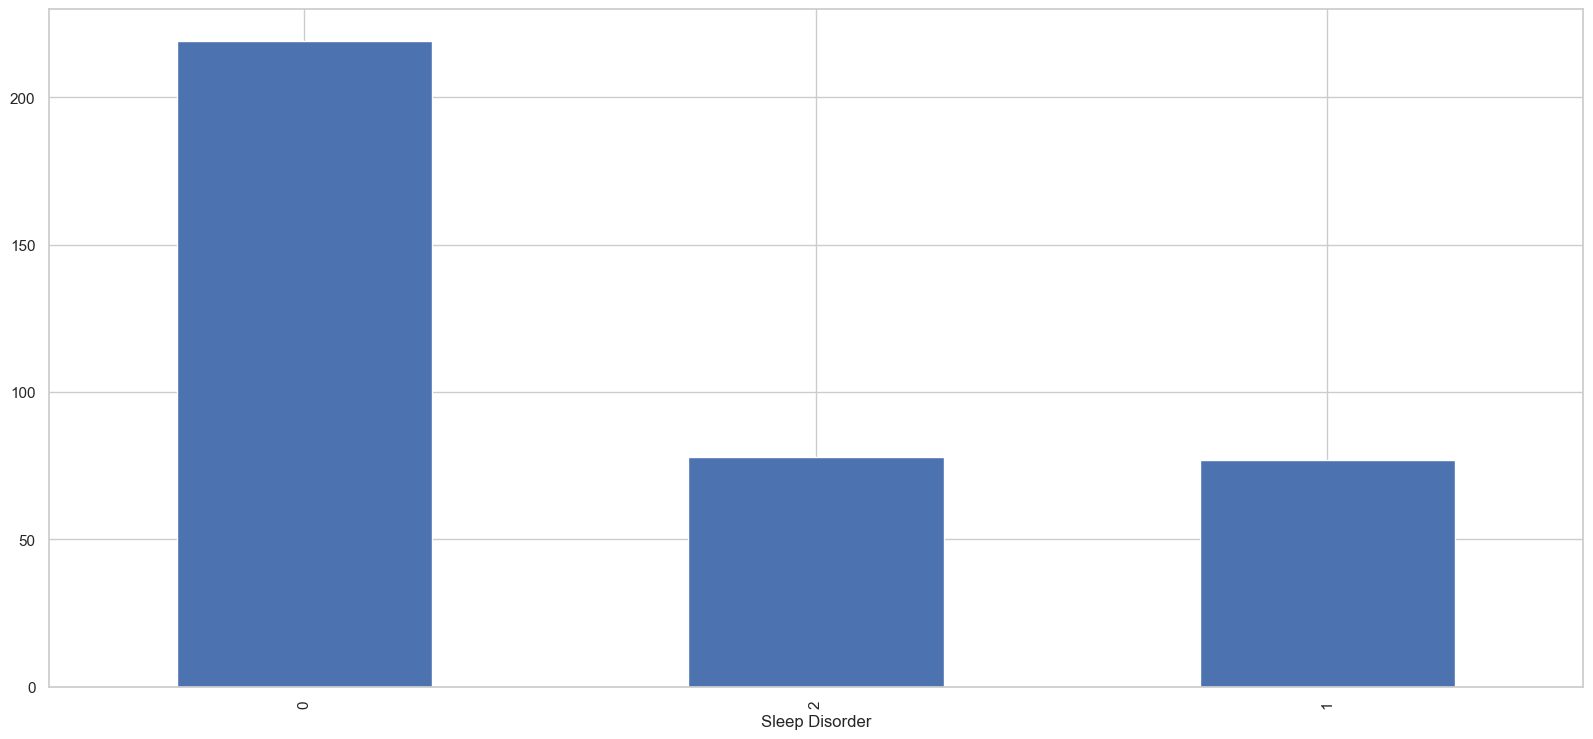

In [63]:
data['Sleep Disorder'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Frecuencia')

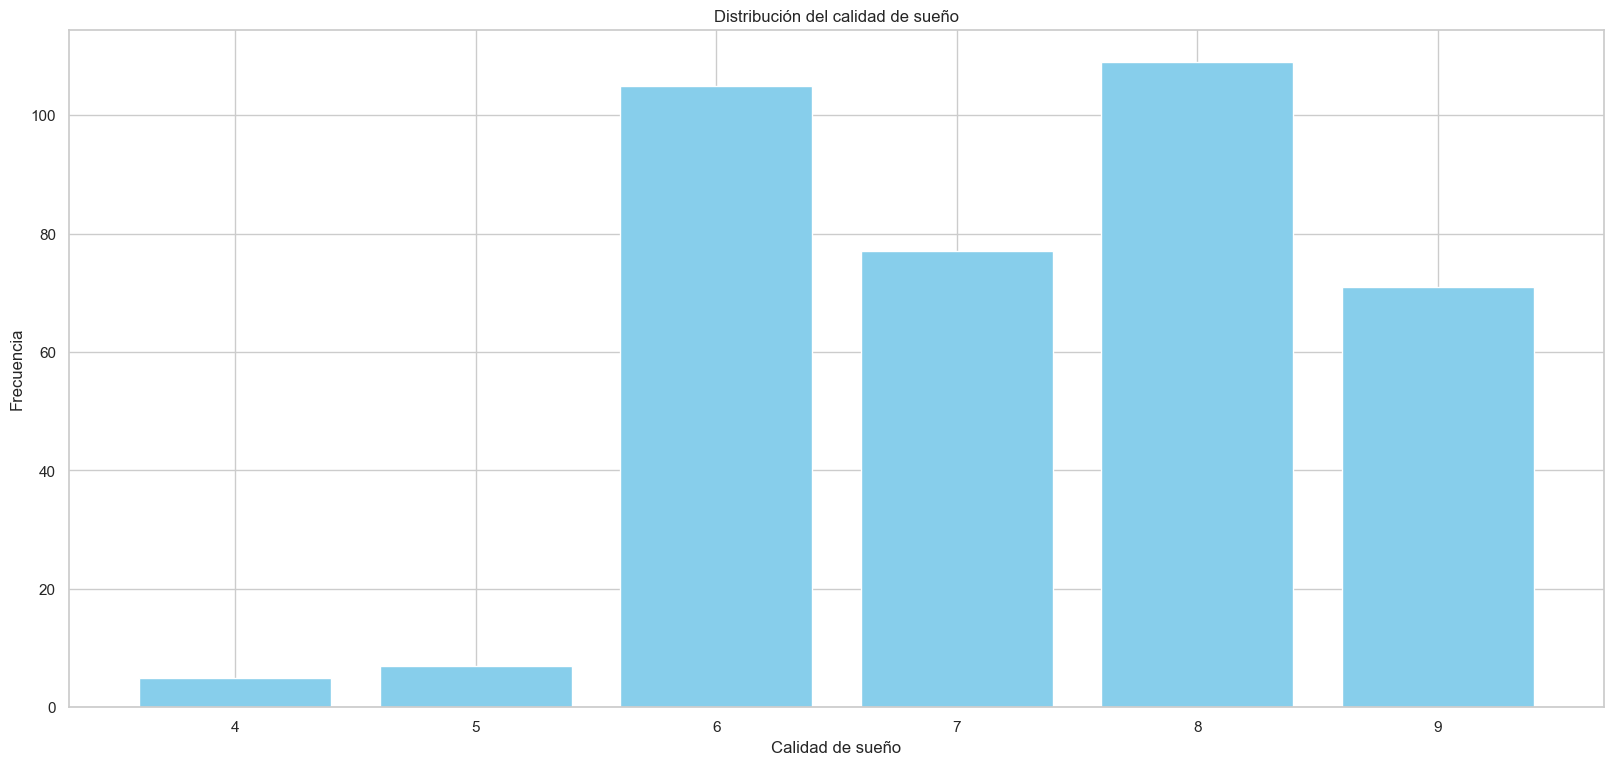

In [64]:
calidad_suenho=data["Quality of Sleep"].value_counts()

plt.bar(calidad_suenho.index,calidad_suenho.values,color='skyblue', alpha=1)

plt.title('Distribución del calidad de sueño')
plt.xlabel('Calidad de sueño')
plt.ylabel('Frecuencia')


<Axes: xlabel='systolic/diastolic'>

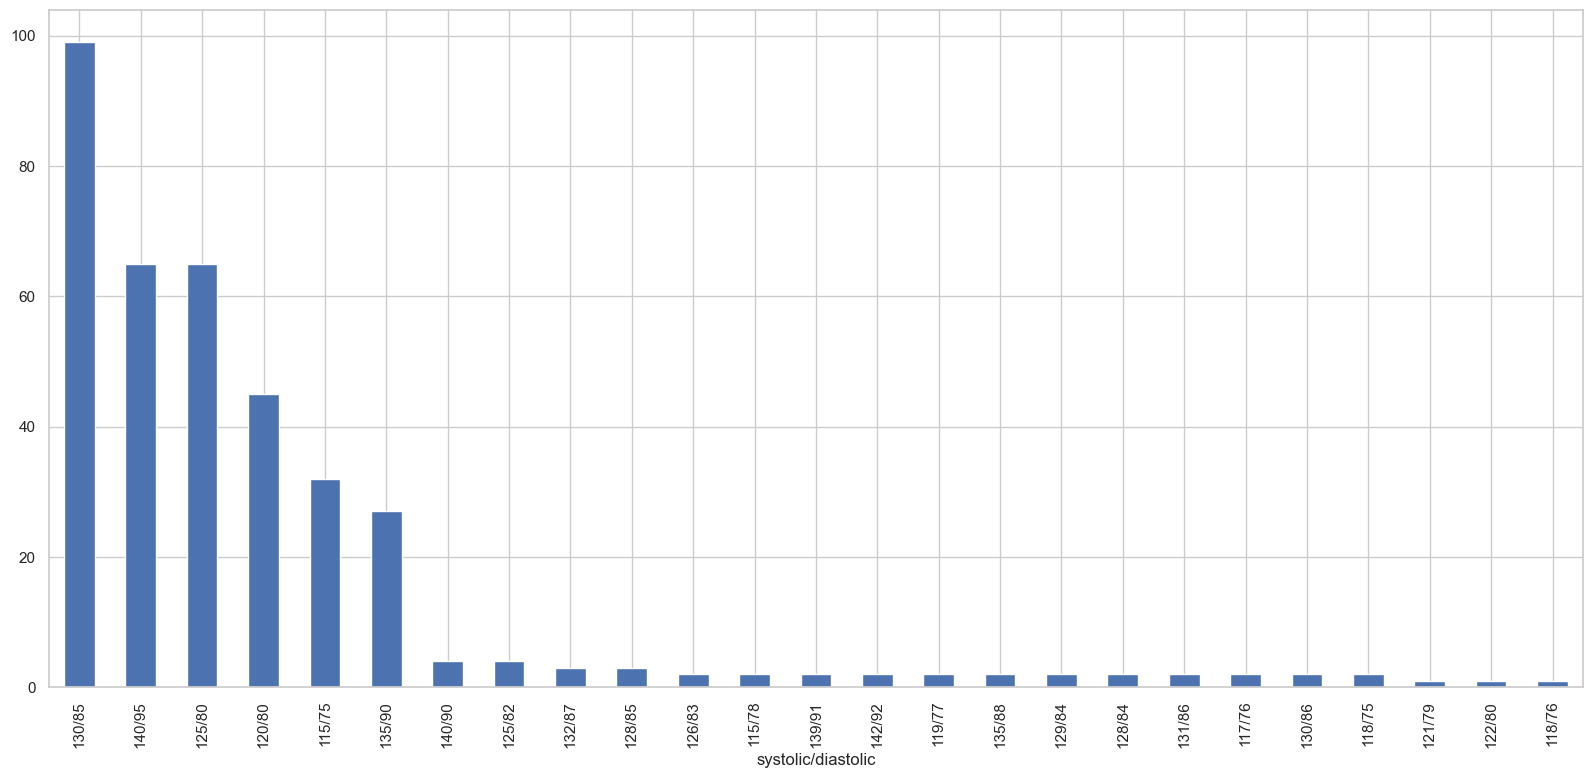

In [65]:
data["Blood Pressure"].value_counts().plot(kind="bar",xlabel="systolic/diastolic")

<Axes: xlabel='BPM', ylabel='Frequency'>

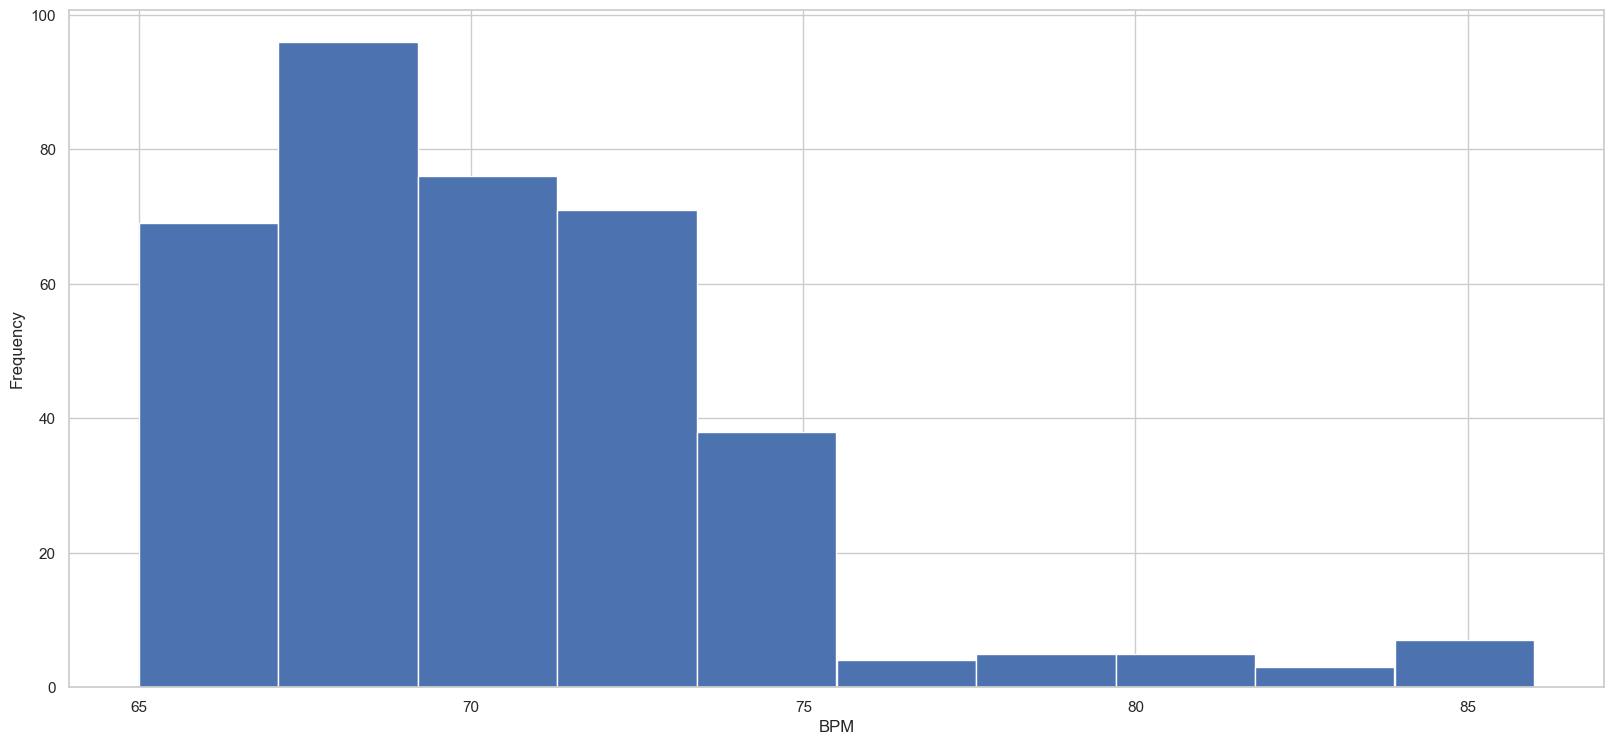

In [66]:
data["Heart Rate"].plot(kind="hist",xlabel="BPM")

Text(0, 0.5, 'Frecuencia')

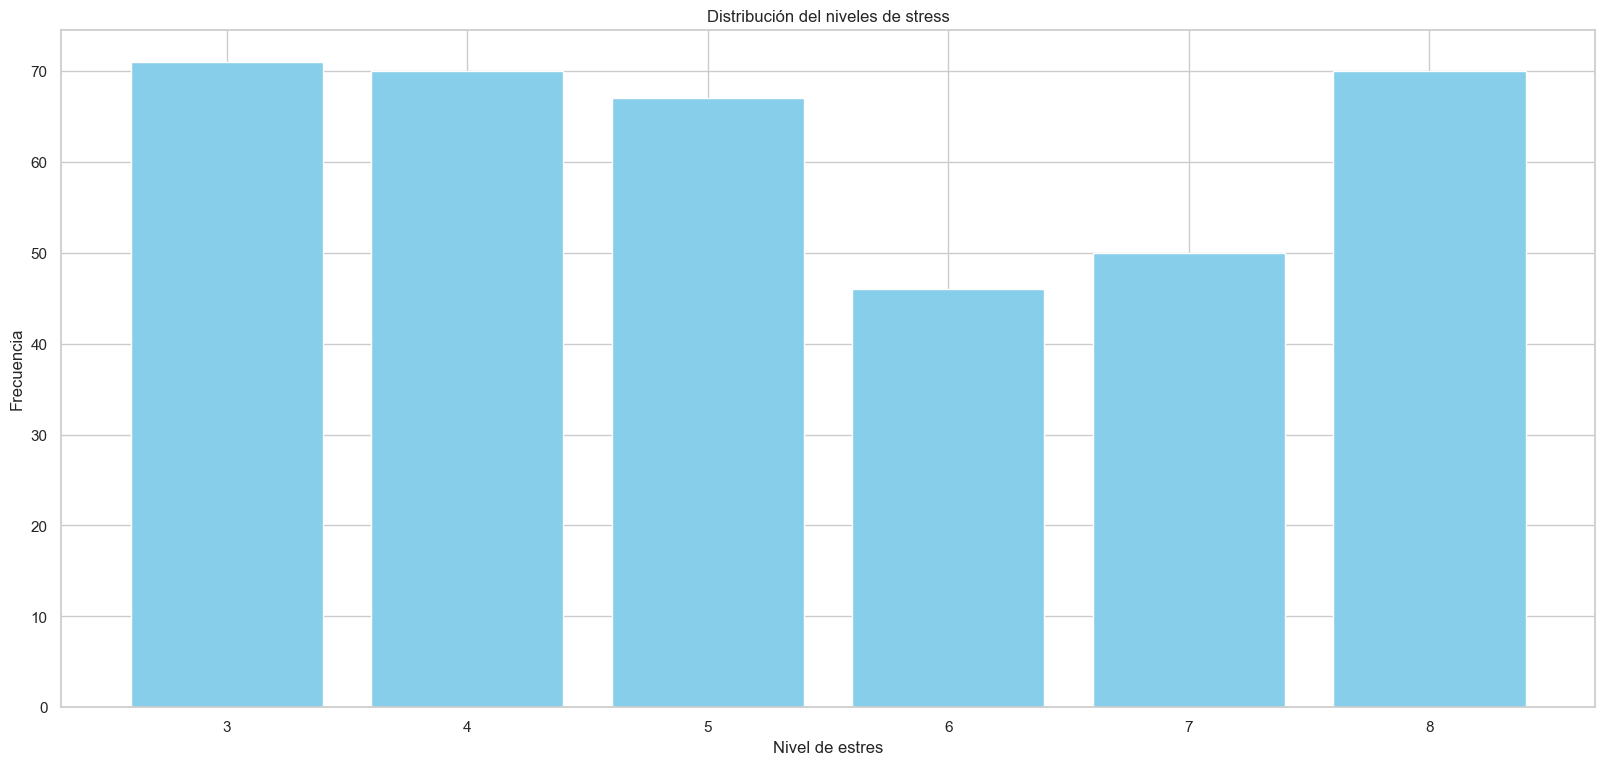

In [67]:
stress_level=data["Stress Level"].value_counts()
plt.bar(stress_level.index,stress_level.values,color='skyblue', alpha=1)

plt.title('Distribución del niveles de stress')
plt.xlabel('Nivel de estres')
plt.ylabel('Frecuencia')


<Axes: xlabel='min'>

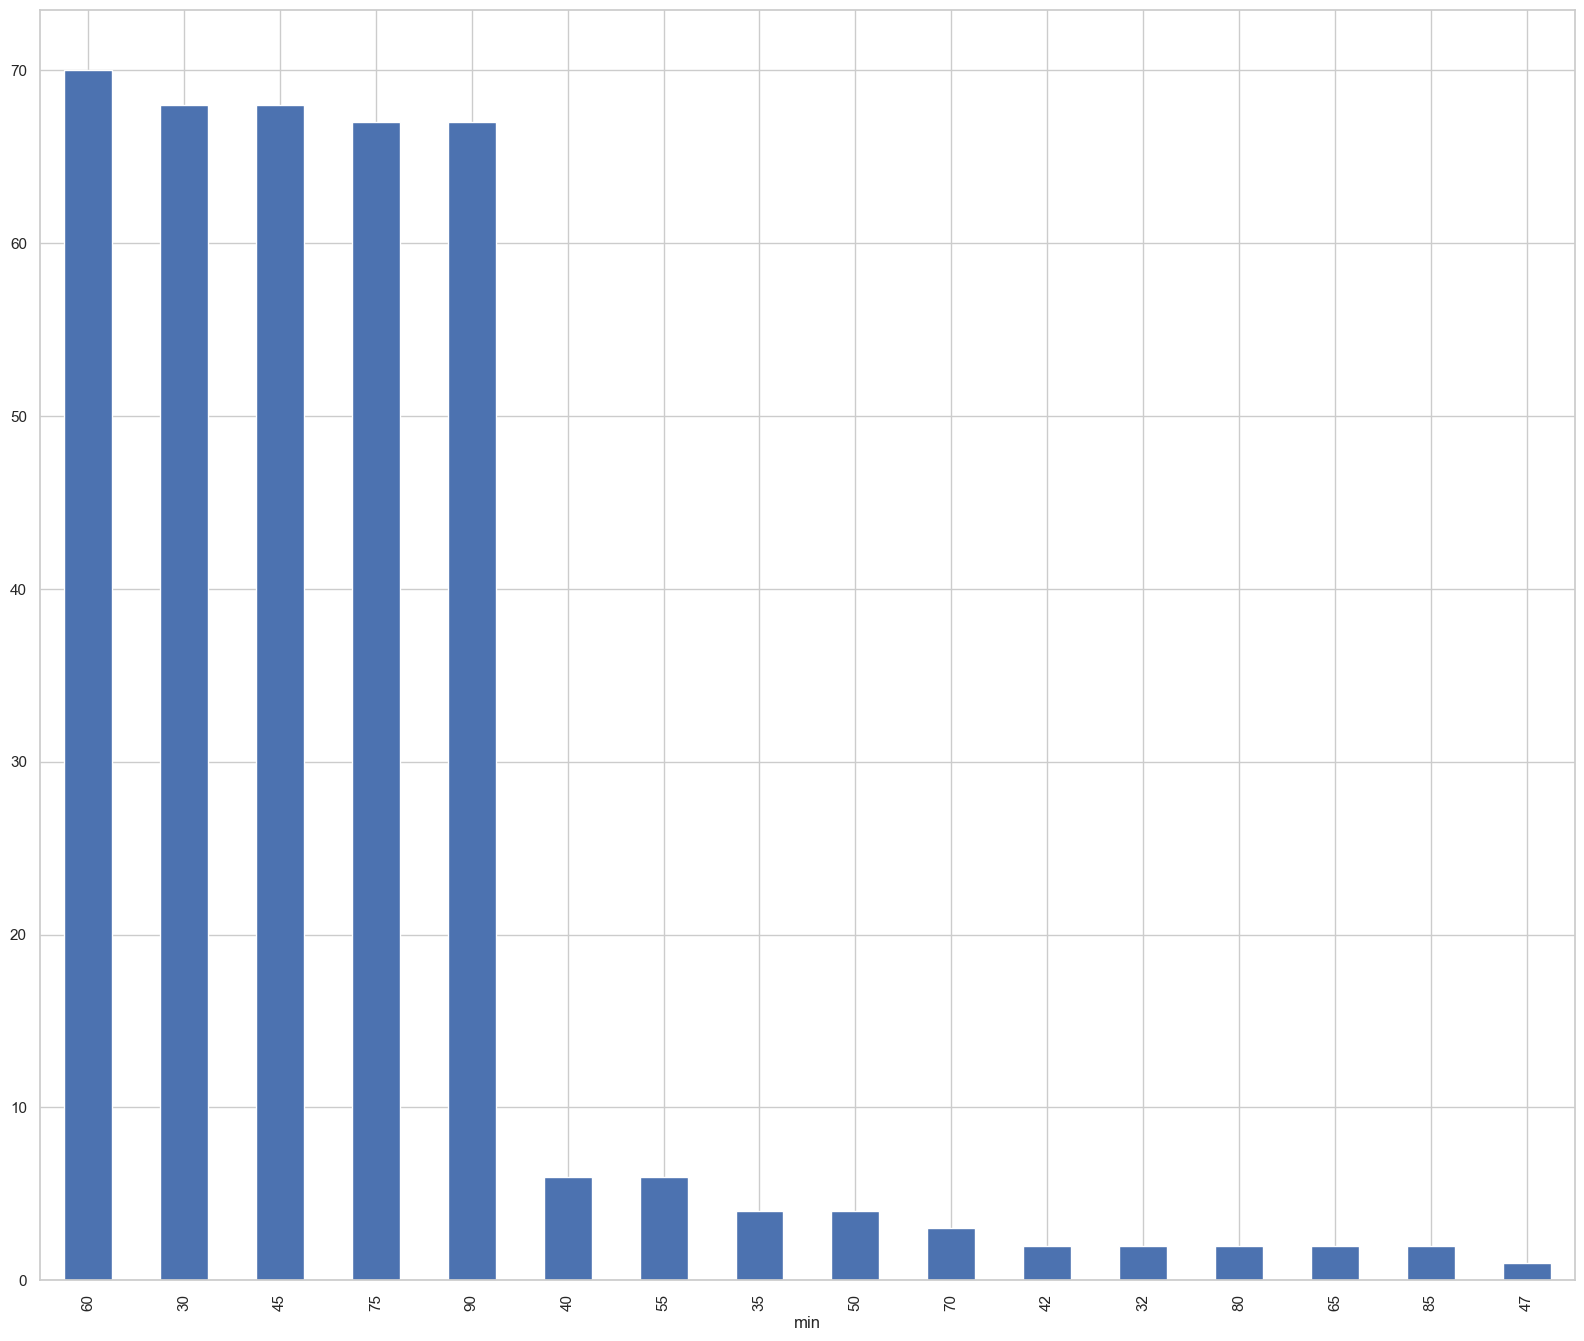

In [46]:
data["Physical Activity Level"].value_counts().plot(kind="bar",xlabel="min")


# **Prueba de Hipótesis**

---

## **Introducción**

Se analizarán dos grupos distintos:

- **Grupo 1:** Personas que no poseen ningún desorden del sueño.
- **Grupo 2:** Personas que sí poseen desórdenes del sueño.

El objetivo es probar si el tener desórdenes del sueño genera una diferencia en los tiempos de sueño entre los dos grupos, se probara con un 95% de confiabilidad.

---

## **Hipótesis**

### **I. Varianza**

- **H0 (Hipótesis Nula):**  
  No hay una diferencia significativa entre la varianza de los tiempos de dormir de ambos grupos.

- **H1 (Hipótesis Alternativa):**  
  Hay una diferencia significativa entre la varianza de los tiempos de dormir de ambos grupos.

### **II. Media**

- **H0 (Hipótesis Nula):**  
  No hay una diferencia significativa entre los promedios de los tiempos de dormir de ambos grupos.

- **H1 (Hipótesis Alternativa):**  
  Hay una diferencia significativa entre los promedios de los tiempos de dormir de ambos grupos.

---




In [21]:
sleep_disorder = data[(data["Sleep Disorder"] == 1) | (data["Sleep Disorder"] == 2)]
without_disorder=data[(data["Sleep Disorder"] == 0)]
without_disorder.describe()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
count,219.000000,219.000000,219.000000,216.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.0
mean,146.972603,0.374429,39.036530,3.208333,7.358447,7.625571,57.949772,5.114155,0.086758,69.018265,6852.968037,0.0
std,100.646895,0.485084,7.827764,2.196853,0.732320,0.975142,20.929814,1.591471,0.282125,2.657797,1393.473600,0.0
min,1.000000,0.000000,27.000000,1.000000,6.000000,6.000000,30.000000,3.000000,0.000000,65.000000,4200.000000,0.0
25%,65.500000,0.000000,32.000000,2.000000,7.100000,7.000000,30.000000,4.000000,0.000000,68.000000,5000.000000,0.0
50%,128.000000,0.000000,38.000000,3.000000,7.400000,8.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,0.0
75%,207.500000,1.000000,43.000000,4.000000,7.800000,8.000000,75.000000,6.000000,0.000000,70.000000,8000.000000,0.0
max,360.000000,1.000000,59.000000,11.000000,8.500000,9.000000,90.000000,8.000000,1.000000,77.000000,10000.000000,0.0


In [22]:
from scipy.stats import levene,ttest_ind
import math
result=levene(sleep_disorder["Sleep Duration"],without_disorder["Sleep Duration"])
result

LeveneResult(statistic=0.007505751507139209, pvalue=0.9310076687467913)

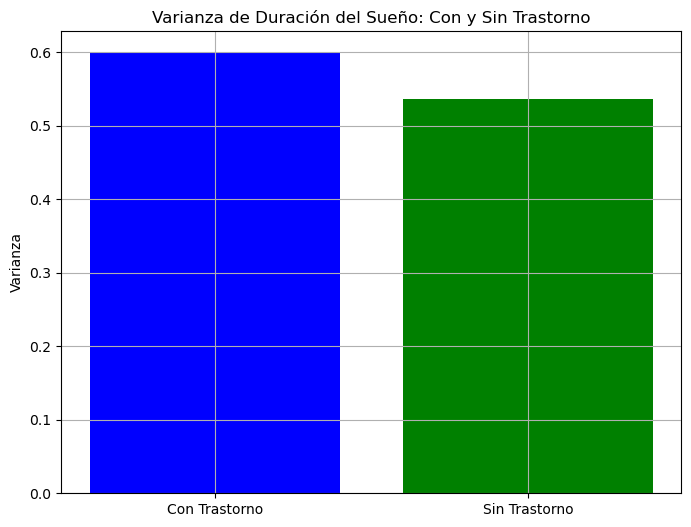

In [23]:
# Calcular las varianzas para cada grupo
variance_sleep_disorder = sleep_disorder["Sleep Duration"].var()
variance_without_disorder = without_disorder["Sleep Duration"].var()

# Configurar los datos para el gráfico de barras
groups = ['Con Trastorno', 'Sin Trastorno']
variances = [variance_sleep_disorder, variance_without_disorder]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(groups, variances, color=['blue', 'green'])
plt.title('Varianza de Duración del Sueño: Con y Sin Trastorno')
plt.ylabel('Varianza')
plt.grid(True)
plt.show()

In [24]:
ttest_ind(sleep_disorder["Sleep Duration"],without_disorder["Sleep Duration"])

TtestResult(statistic=-6.9411728907765555, pvalue=1.7383790339837897e-11, df=372.0)

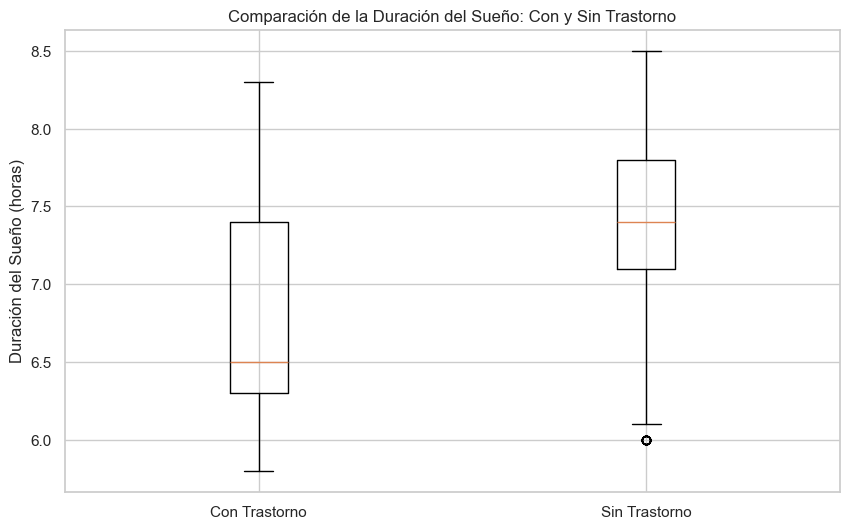

In [81]:
# Crear un gráfico de caja para visualizar la duración del sueño en ambos grupos
data_to_plot = [sleep_disorder["Sleep Duration"], without_disorder["Sleep Duration"]]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Con Trastorno', 'Sin Trastorno'])
plt.title('Comparación de la Duración del Sueño: Con y Sin Trastorno')
plt.ylabel('Duración del Sueño (horas)')
plt.grid(True)
plt.show()

In [73]:
mean=without_disorder["Sleep Duration"].mean()
std=without_disorder["Sleep Duration"].std()
zvalue=2.57
interval=(mean-math.sqrt(std/219),mean+math.sqrt(std/219))
print(interval)
print(sleep_disorder["Sleep Duration"].mean())


(7.300620780083558, 7.416274197085394)
6.812258064516129


# **Resultados de Ambas Pruebas de Hipótesis**

---

## **I. Varianza**

- **Conclusión:**  
  No se rechaza la hipótesis nula.

- **Razón:**  
  El valor `p` es mayor que el nivel de significancia (`α`), lo que indica que no hay una diferencia significativa en la varianza de ambas muestras.

- **Detalles:**  
  `p-value = 0.9310` (mayor que `0.05`)

    ```markdown
    0.9310076687467913 > 0.05
    ```

---

## **II. Media**

- **Conclusión:**  
  Se rechaza la hipótesis nula.

- **Razón:**  
  El valor `p` es menor que el nivel de significancia (`α`), lo que indica que hay una diferencia significativa en la media de las muestras.

- **Detalles:**  
  `p-value = 1.7384e-11` (menor que `0.05`)

    ```markdown
    1.7383790339837897e-11 < 0.05
    ```

---



Test de Hipotesis 

In [95]:

# Función para realizar el test de hipótesis para cada variable independiente
def test_de_hipotesis(model, variable_name):
    # Obtener los coeficientes, errores estándar y valores p del modelo
    coef = model.params[variable_name]
    std_err = model.bse[variable_name]
    t_value = model.tvalues[variable_name]
    p_value = model.pvalues[variable_name]
    
    # Formulación de la hipótesis
    H0 = f"H0: El coeficiente de {variable_name} es 0 (no hay efecto significativo)"
    H1 = f"H1: El coeficiente de {variable_name} no es 0 (hay efecto significativo)\n"
    
    # Resultados del test de hipótesis
    print(f"\nTest de Hipótesis para {variable_name}\n")
    print(H0)
    print(H1)
    print(f"Coeficiente: {coef}")
    print(f"Error Estándar: {std_err}")
    print(f"t-valor: {t_value}")
    print(f"p-valor: {p_value}")
    
    # Interpretación del resultado
    alpha = 0.05
    if p_value < alpha:
        print(f"\nResultado: Rechazamos la hipótesis nula. {variable_name} tiene un efecto significativo en la calidad del sueño.")
    else:
        print(f"Resultado: No podemos rechazar la hipótesis nula. {variable_name} no tiene un efecto significativo en la calidad del sueño.")



In [98]:
# Realizar el test de hipótesis para cada variable independiente
variables = ['Sleep Duration']
for var in variables:
    test_de_hipotesis(model, var)


Test de Hipótesis para Sleep Duration

H0: El coeficiente de Sleep Duration es 0 (no hay efecto significativo)
H1: El coeficiente de Sleep Duration no es 0 (hay efecto significativo)

Coeficiente: 0.6933328084106253
Error Estándar: 0.045183378286229245
t-valor: 15.34486429984222
p-valor: 1.7851555444481535e-41

Resultado: Rechazamos la hipótesis nula. Sleep Duration tiene un efecto significativo en la calidad del sueño.


In [99]:

# Realizar el test de hipótesis para cada variable independiente
variables = ['Stress Level']
for var in variables:
    test_de_hipotesis(model, var)


Test de Hipótesis para Stress Level

H0: El coeficiente de Stress Level es 0 (no hay efecto significativo)
H1: El coeficiente de Stress Level no es 0 (hay efecto significativo)

Coeficiente: -0.2966106448757445
Error Estándar: 0.023369745261471023
t-valor: -12.692078649430437
p-valor: 6.844526857236217e-31

Resultado: Rechazamos la hipótesis nula. Stress Level tiene un efecto significativo en la calidad del sueño.


In [100]:


# Realizar el test de hipótesis para cada variable independiente
variables = ['Heart Rate']
for var in variables:
    test_de_hipotesis(model, var)


Test de Hipótesis para Heart Rate

H0: El coeficiente de Heart Rate es 0 (no hay efecto significativo)
H1: El coeficiente de Heart Rate no es 0 (hay efecto significativo)

Coeficiente: -0.03681625662930593
Error Estándar: 0.006850514319109113
t-valor: -5.374232490341509
p-valor: 1.3640266437252457e-07

Resultado: Rechazamos la hipótesis nula. Heart Rate tiene un efecto significativo en la calidad del sueño.


Test de hipotesis Muestral

In [78]:
from scipy import stats

# Seleccionar la variable de interés
sleep_duration = data['Sleep Duration']

# Definir la media poblacional hipotética
mu = 8

# Realizar el test de hipótesis
t_statistic, p_value = stats.ttest_1samp(sleep_duration, mu)

# Imprimir los resultados
print(f't-valor: {t_statistic}')
print(f'p-valor: {p_value}')

# Nivel de significancia
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. La duración del sueño es significativamente diferente de 8 horas.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la duración del sueño es diferente de 8 horas.")
  

t-valor: -21.095361561847522
p-valor: 1.3829763777878594e-65
Rechazamos la hipótesis nula. La duración del sueño es significativamente diferente de 8 horas.


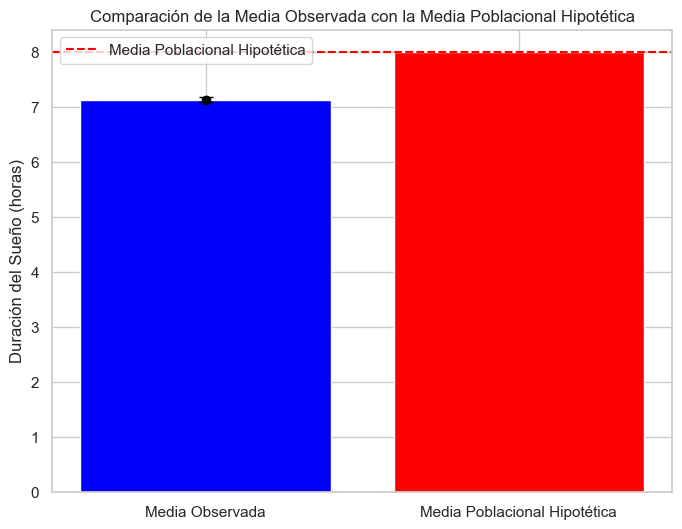

t-valor: -21.095361561847522
p-valor: 1.3829763777878594e-65
Rechazamos la hipótesis nula. La duración del sueño es significativamente diferente de 8 horas.


In [79]:
sleep_duration = data['Sleep Duration']

# Definir la media poblacional hipotética
mu = 8

# Realizar el test de hipótesis
t_statistic, p_value = stats.ttest_1samp(sleep_duration, mu)

# Calcular la media observada
mean_observed = sleep_duration.mean()

# Configurar el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Media Observada', 'Media Poblacional Hipotética'], [mean_observed, mu], color=['blue', 'red'])
plt.errorbar(['Media Observada'], [mean_observed], yerr=stats.sem(sleep_duration), fmt='o', color='black', capsize=5)
plt.axhline(y=mu, color='red', linestyle='--', label='Media Poblacional Hipotética')
plt.title('Comparación de la Media Observada con la Media Poblacional Hipotética')
plt.ylabel('Duración del Sueño (horas)')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los resultados
print(f't-valor: {t_statistic}')
print(f'p-valor: {p_value}')

# Nivel de significancia
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. La duración del sueño es significativamente diferente de 8 horas.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la duración del sueño es diferente de 8 horas.")

In [153]:
  # Crear una columna para categorizar el nivel de estrés (por ejemplo, alto o bajo)
stress_threshold = data['Stress Level'].median()
data['Stress Category'] = ['Alto' if x > stress_threshold else 'Bajo' for x in data['Stress Level']]

# Separar los datos en dos grupos
group_high_stress = data[data['Stress Category'] == 'Alto']['Sleep Duration']
group_low_stress = data[data['Stress Category'] == 'Bajo']['Sleep Duration']

# Realizar el test de hipótesis para comparar los grupos
t_statistic, p_value = stats.ttest_ind(group_high_stress, group_low_stress)

# Imprimir los resultados
print(f't-valor: {t_statistic}')
print(f'p-valor: {p_value}')

# Nivel de significancia
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en la duración del sueño entre los grupos de alto y bajo estrés.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que hay una diferencia en la duración del sueño entre los grupos de alto y bajo estrés.")

t-valor: -15.959066274214997
p-valor: 4.777023402486287e-44
Rechazamos la hipótesis nula. Hay una diferencia significativa en la duración del sueño entre los grupos de alto y bajo estrés.


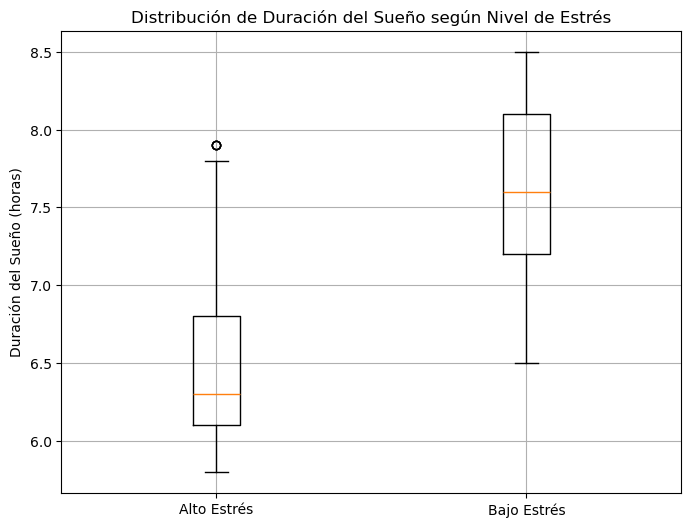

In [159]:
# Separar los datos en grupos de alto y bajo estrés
group_high_stress = data[data['Stress Category'] == 'Alto']['Sleep Duration']
group_low_stress = data[data['Stress Category'] == 'Bajo']['Sleep Duration']

# Crear el gráfico de cajas
plt.figure(figsize=(8, 6))
plt.boxplot([group_high_stress, group_low_stress], labels=['Alto Estrés', 'Bajo Estrés'])
plt.title('Distribución de Duración del Sueño según Nivel de Estrés')
plt.ylabel('Duración del Sueño (horas)')
plt.grid(True)
plt.show()

t-valor: -6.9411728907765555
p-valor: 1.7383790339837897e-11
Rechazamos la hipótesis nula. Hay una diferencia significativa entre los promedios de los tiempos de dormir de ambos grupos.


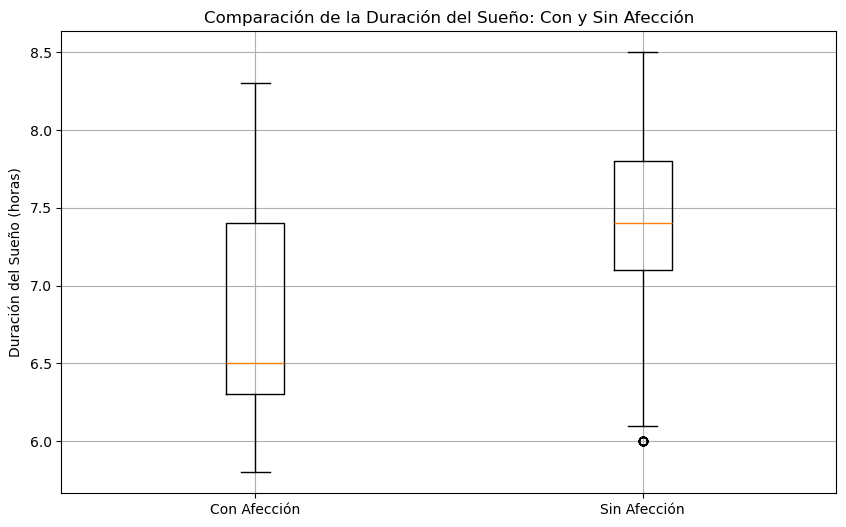

In [26]:
# Realizar el test t de muestras independientes
t_statistic, p_value = ttest_ind(sleep_disorder["Sleep Duration"], without_disorder["Sleep Duration"])

# Imprimir los resultados del test t
print(f't-valor: {t_statistic}')
print(f'p-valor: {p_value}')

# Nivel de significancia
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa entre los promedios de los tiempos de dormir de ambos grupos.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que hay una diferencia entre los promedios de los tiempos de dormir de ambos grupos.")

# Crear un gráfico de caja para visualizar la duración del sueño en ambos grupos
data_to_plot= [sleep_disorder["Sleep Duration"], without_disorder["Sleep Duration"]]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Con Afección', 'Sin Afección'])
plt.title('Comparación de la Duración del Sueño: Con y Sin Afección')
plt.ylabel('Duración del Sueño (horas)')
plt.grid(True)
plt.show()